**Load and explore the dataset**

In [3]:
library(dslabs)
library(tidyverse)
data(gapminder)
gapminder %>% head()
str(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


**Compare infant mortality in Sri Lanka and Turkey in 2015**

In [11]:
gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)

country,infant_mortality
Sri Lanka,8.4
Turkey,11.6


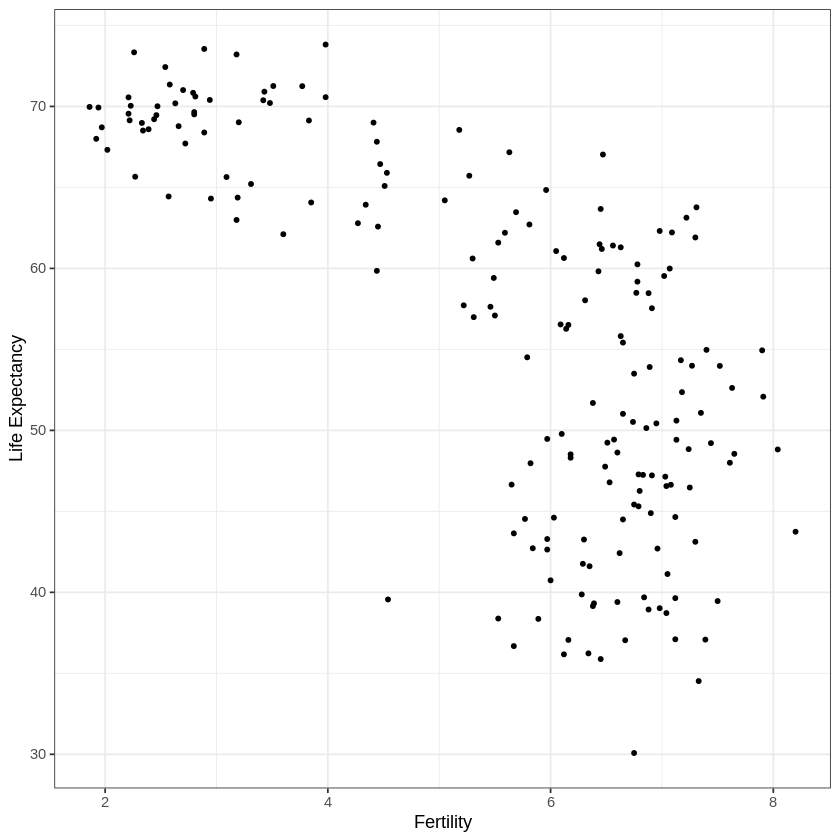

In [21]:
#basic scatterplot of life expectancy versus fertility in year 1962
ds_theme_set()
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy)) +
    geom_point(size = 1) +
    ylab("Life Expectancy") +
    xlab("Fertility")

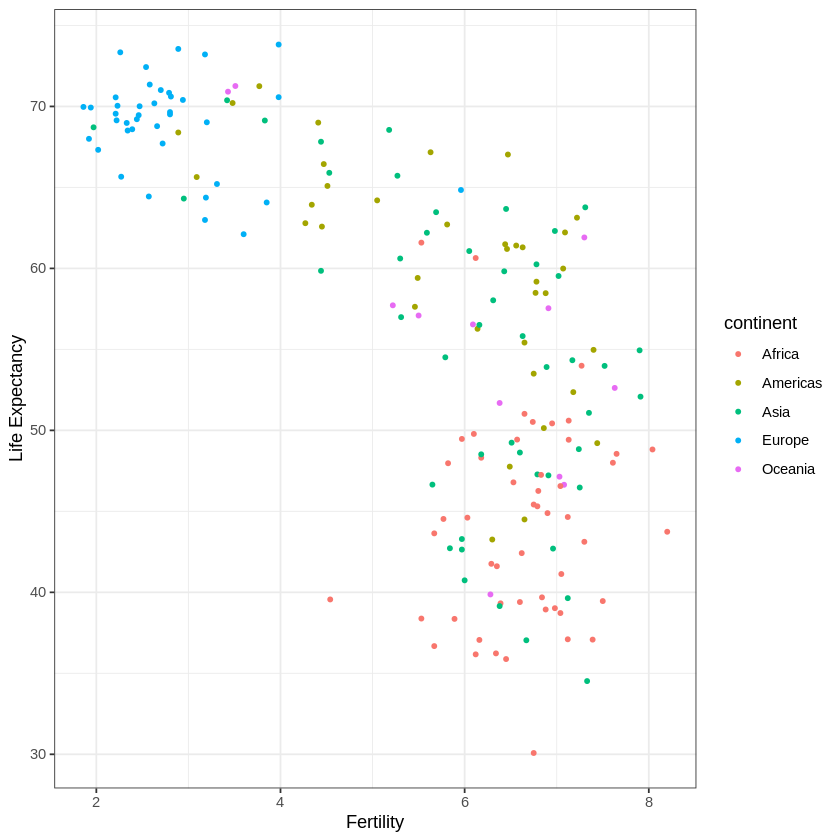

In [23]:
# Add color based on continent
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    ylab("Life Expectancy") +
    xlab("Fertility")